In [30]:
import pandas as pd
import proplot as plot
import matplotlib.pyplot as plt

In [13]:
from pathlib import Path

In [14]:
PATH_DATA = Path("../data")

In [15]:
deltas = ["30", "40", "50"]

In [42]:
experimental_polars = dict()
for delta in deltas:
    
    _name = "delta_" + delta + ".csv"
    _path = PATH_DATA / _name
    
    polar = pd.read_csv(_path).set_index("alpha").squeeze()
    
    experimental_polars[delta] = polar

# Read base airfoil
_name = "base.csv"
_path = PATH_DATA / _name

base = pd.read_csv(_path).set_index("alpha").squeeze()

experimental_polars["base"] = base

In [43]:
polars = pd.DataFrame(experimental_polars)

In [44]:
polars.interpolate(method = "index")

,30,40,50,base
alpha,,,,
-9.935070,1.006662,NaN,NaN,NaN
-9.888692,1.012273,NaN,1.292436,NaN
-9.814909,1.021199,1.156168,1.299648,NaN
-8.979678,1.122247,1.293617,1.381283,NaN
-8.340079,1.199626,1.371808,1.443798,NaN
-8.335441,1.200187,1.372375,1.444237,NaN
-7.873345,1.256092,1.435132,1.488010,NaN
-7.808416,1.256177,1.443950,1.494161,NaN
-7.563032,1.286175,1.477275,1.517405,NaN


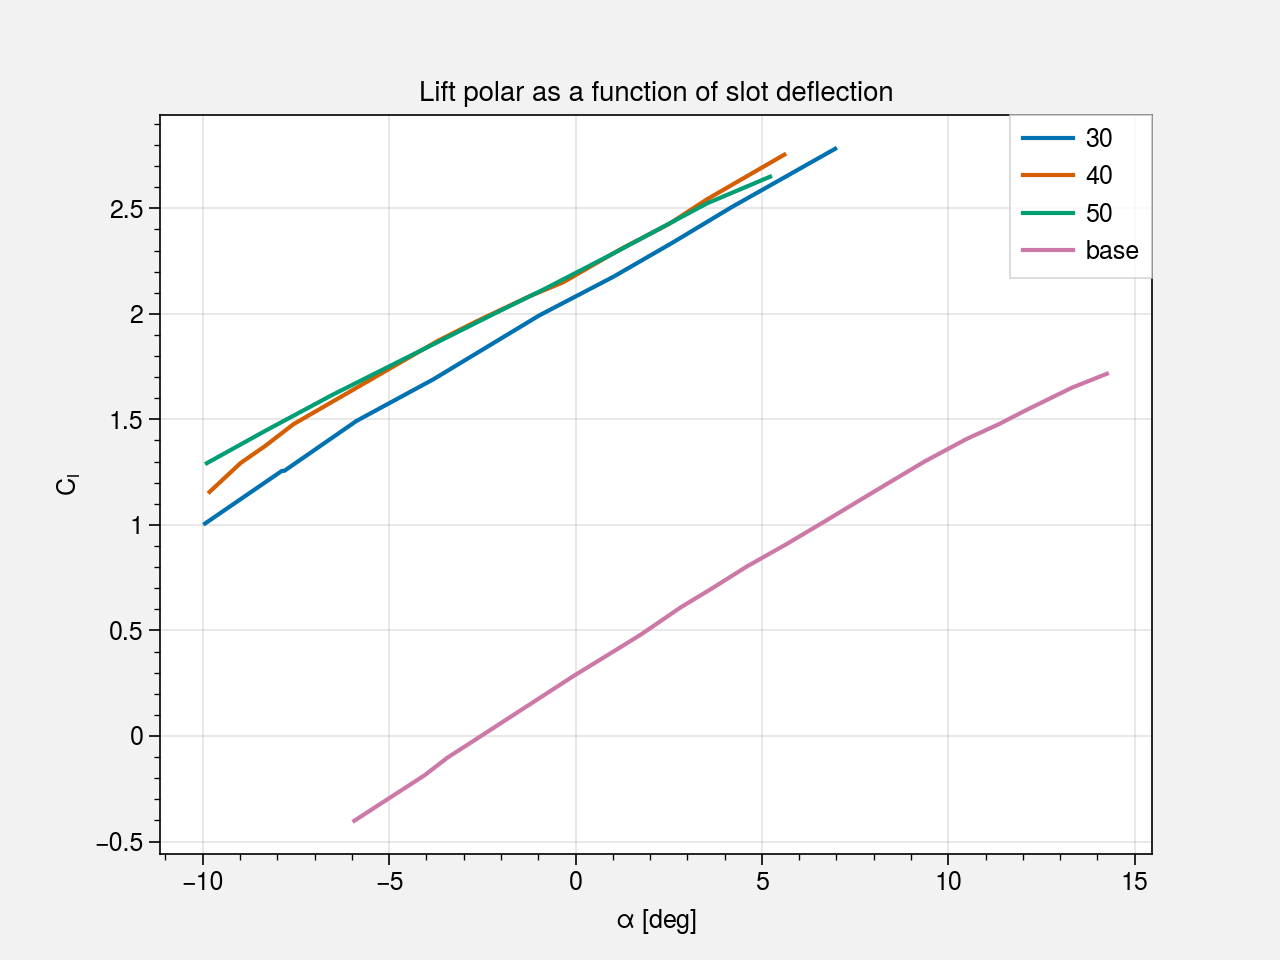

In [45]:
axes = polars.interpolate(method="index", limit_area="inside").plot()

axes.set_ylabel("$C_l$")
axes.set_xlabel("$\\alpha$ [deg]")
axes.set_title("Lift polar as a function of slot deflection")

plt.savefig("lift_polar.png", dpi=300, transparent=True, bbox_inches="tight")

In [46]:
print(polars.interpolate(method="index", limit_area="inside").reset_index().round(3).set_index("alpha").to_latex(na_rep=''))

\begin{tabular}{lrrrr}
\toprule
{} &     30 &     40 &     50 &   base \\
alpha   &        &        &        &        \\
\midrule
-9.935  &  1.007 &        &        &        \\
-9.889  &  1.012 &        &  1.292 &        \\
-9.815  &  1.021 &  1.156 &  1.300 &        \\
-8.980  &  1.122 &  1.294 &  1.381 &        \\
-8.340  &  1.200 &  1.372 &  1.444 &        \\
-8.335  &  1.200 &  1.372 &  1.444 &        \\
-7.873  &  1.256 &  1.435 &  1.488 &        \\
-7.808  &  1.256 &  1.444 &  1.494 &        \\
-7.563  &  1.286 &  1.477 &  1.517 &        \\
-6.533  &  1.412 &  1.582 &  1.615 &        \\
-6.531  &  1.412 &  1.583 &  1.615 &        \\
-5.934  &  1.485 &  1.643 &  1.668 & -0.402 \\
-5.876  &  1.492 &  1.649 &  1.673 & -0.395 \\
-5.499  &  1.528 &  1.688 &  1.707 & -0.352 \\
-4.596  &  1.615 &  1.780 &  1.787 & -0.249 \\
-4.049  &  1.667 &  1.836 &  1.835 & -0.186 \\
-3.811  &  1.690 &  1.860 &  1.856 & -0.154 \\
-3.693  &  1.703 &  1.872 &  1.867 & -0.138 \\
-3.438  &  1.730 &  1.89